<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(12.11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-12-11 06:18:04--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-11 06:18:05--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://altushost-swe.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-11 06:18:05--  http://altushost-s

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta

In [4]:
Toyota_tick = "7203.T" # トヨタ
Hondagiken_tick = "7267.T" # 本田技研工業
Hitati_tick = "6501.T" # 日立製作所
Sony_tick = "6758.T" # ソニーグループ
Nissan_tick = "7201.T" # 日産自動車
Softbank_tick = "9984.T" # ソフトバンク
Aisin_tick = "7359.T" # アイシン
Fujitu_tick = "6702.T" # 富士通
Suzuki_tick = "7269.T" # スズキ

In [18]:
Toyota_df = yf.download(Toyota_tick, start="2004-01-01", end="2024-01-01")["Close"]
Hondagiken_df = yf.download(Hondagiken_tick, start="2004-01-01", end="2024-01-01")["Close"]
Hitati_df = yf.download(Hitati_tick, start="2004-01-01", end="2024-01-01")["Close"]
Sony_df = yf.download(Sony_tick, start="2004-01-01", end="2024-01-01")["Close"]
Nissan_df = yf.download(Nissan_tick, start="2004-01-01", end="2024-01-01")["Close"]
Softbank_df = yf.download(Softbank_tick, start="2004-01-01", end="2024-01-01")["Close"]
Aisin_df = yf.download(Aisin_tick, start="2004-01-01", end="2024-01-01")["Close"]
Fujitu_df = yf.download(Fujitu_tick, start="2000-01-01", end="2024-01-01")["Close"]
Suzuki_df = yf.download(Suzuki_tick,start="2000-01-01", end="2024-01-01")["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
Toyota_df.describe()

Ticker,7203.T
count,4961.000000
mean,1240.790446
std,473.414942
min,475.200012
25%,810.000000
50%,1242.000000
75%,1477.400024
max,2892.500000


In [20]:
Toyota_Search = pd.read_csv("/content/Toyota_Search.csv",encoding="shift-jis")
Toyota_Search.head()

,Year,Count
0,4-Jan,76
1,4-Feb,74
2,4-Mar,77
3,4-Apr,77
4,4-May,75


In [21]:
Toyota_df.head()

Ticker,7203.T
Date,
2004-01-01,724.0
2004-01-02,724.0
2004-01-05,756.0
2004-01-06,746.0
2004-01-07,734.0


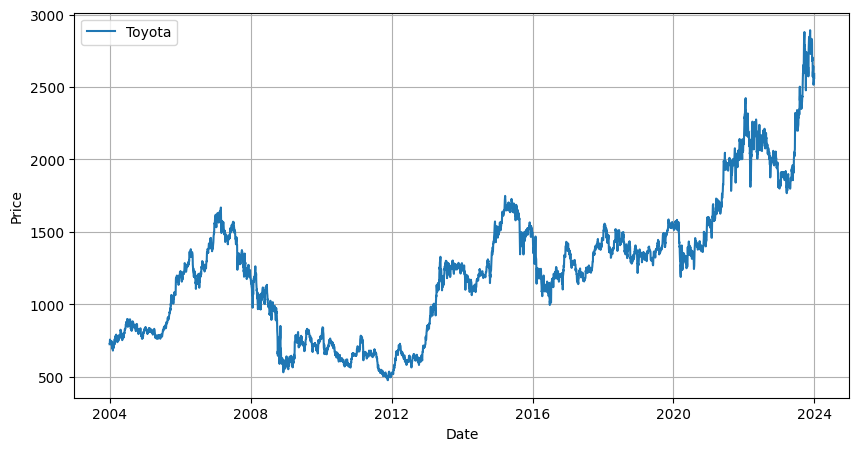

In [22]:
figwidth = 10
fighith = 5
fig, ax = plt.subplots(figsize=(figwidth,fighith))
ax.plot(Toyota_df.index, Toyota_df.values, label="Toyota")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

https://chatgpt.com/share/67593240-964c-8004-8080-1749cc04b9b8

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x7c5fb20c9300>.

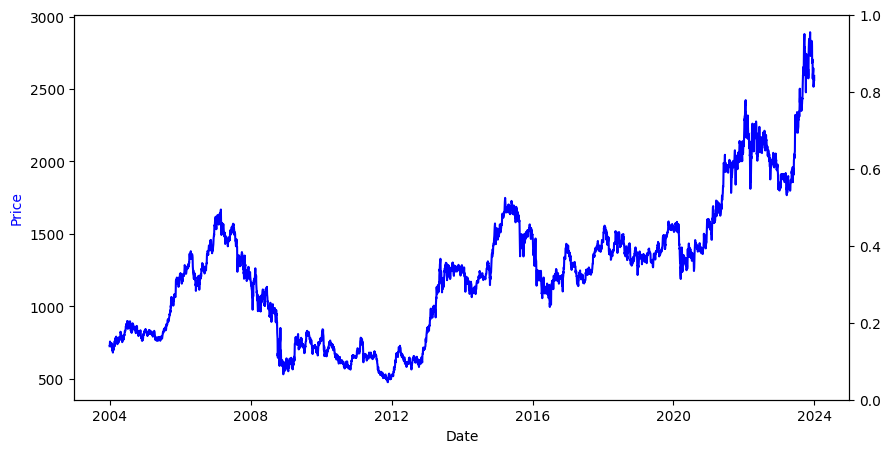

In [25]:
figwidth = 10
fighith = 5

# 図と軸の作成
fig, ax1 = plt.subplots(figsize=(figwidth, fighith))

# 左Y軸のプロット (株価)
ax1.plot(Toyota_df.index, Toyota_df.values, label="Toyota", color='blue')
ax1.set_xlabel("Date")  # X軸のラベル
ax1.set_ylabel("Price", color='blue')  # 左Y軸のラベル

# 右Y軸のプロット (検索数)
ax2 = ax1.twinx()
ax2.plot(Toyota_Search["Year"], Toyota_Search["Count"], label="Toyota_Search", color='orange')
ax2.set_ylabel("Count", color='orange')  # 右Y軸のラベル

# グリッドとレイアウト調整
ax1.grid()  # グリッドを追加
fig.tight_layout()  # レイアウト調整

# グラフを表示
plt.show()

- Typeをそろえる。[時系列の]
- lenをそろえる。


In [27]:
print(type(Toyota_df))
print(type(Toyota_Search))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
